## Read the submit file

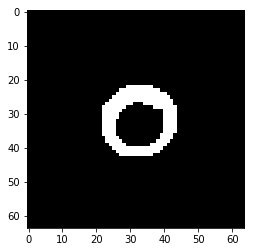

In [2]:
import gzip
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

base_dir = 'D:/DeepLearn/output'
file_path = os.path.join(base_dir, 'submit01282019_epoch150_Myocardium.csv.gz')

with gzip.open(file_path) as f:
    features_train = pd.read_csv(f)

features_example = features_train['rle_mask'][0]

def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)


# Show an example
mask = rle_decode(features_example, [64,64])
plt.imshow(mask,'gray')
plt.show()

# Decoding all
shape = [64, 64]
out_dir = os.path.join(base_dir, 'PredLabel')
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
    
for i in range(len(features_train)):
    rle_mask = features_train['rle_mask'][i]
    mask = np.zeros(shape)
    
    if not pd.isnull(rle_mask):
        mask = rle_decode(rle_mask, shape)
    
    out_file = os.path.join(out_dir, features_train['img'][i])
    img = Image.fromarray(mask, 'L')
    img.save(out_file)


In [3]:
features_train

img                                           rle_mask
0    100.tif  1438 8 1500 12 1563 15 1626 17 1689 19 1752 8 ...
1    107.tif  1312 5 1372 11 1435 14 1498 16 1561 7 1573 6 1...
2    119.tif  1117 8 1179 13 1241 16 1303 20 1366 6 1381 7 1...
3     12.tif  607 5 665 15 727 20 789 24 852 7 868 11 914 7 ...
4    129.tif  1503 9 1565 12 1627 15 1690 6 1700 7 1753 5 17...
5    132.tif  800 3 858 12 920 16 982 20 1045 22 1108 8 1125...
6    133.tif  795 10 855 17 918 20 980 23 1044 24 1107 11 11...
7    134.tif  799 7 858 15 919 19 980 23 1043 25 1107 26 117...
8    135.tif  861 8 922 13 985 16 1048 19 1110 22 1173 10 11...
9    160.tif  859 15 920 20 983 23 1045 9 1059 12 1108 7 112...
10   167.tif  1054 11 1115 17 1176 23 1238 26 1301 12 1317 1...
11   172.tif  737 6 795 15 857 19 919 23 982 25 1045 10 1060...
12   185.tif  859 13 921 18 984 21 1046 8 1060 10 1109 5 112...
13   188.tif  1117 8 1178 14 1240 18 1303 20 1366 22 1430 23...
14    19.tif  666 15 727 21 788 27 850 30 913 33 975 6 982 3...
15   191.tif  807 1 857 19 919 24 981 27 1044 29 1107 31 117...
16   192.tif  613 2 664 2 674 9 726 23 789 25 851 28 914 30 ...
17   195.tif  670 6 730 18 792 22 851 28 913 31 976 33 1039 ...
18   197.tif  860 12 921 18 983 22 1045 26 1108 29 1170 15 1...
19   213.tif  1122 5 1180 13 1241 18 1303 21 1366 23 1428 26...
20   215.tif  802 4 861 12 922 17 983 21 1045 25 1107 28 117...
21   223.tif  1117 13 1179 17 1241 20 1304 22 1366 25 1429 1...
22   225.tif  540 7 600 14 662 20 724 24 786 27 849 12 869 1...
23   231.tif  1055 8 1115 14 1177 17 1239 20 1302 23 1365 11...
24   233.tif  1312 9 1373 13 1435 17 1497 20 1559 9 1571 11 ...
25   237.tif  798 10 859 17 921 21 983 24 1046 27 1108 30 11...
26   239.tif  740 3 796 15 857 20 919 23 982 25 1045 27 1108...
27   252.tif  665 11 727 18 790 21 852 8 863 15 915 6 932 12...
28   257.tif  798 1 859 8 921 13 983 17 1046 20 1108 8 1123 ...
29    26.tif  988 1 1049 11 1112 14 1175 16 1238 9 1249 8 13...
..       ...                                                ...
80   459.tif  735 3 795 11 856 16 919 20 981 10 997 7 1044 1...
81    46.tif  1305 12 1366 19 1429 22 1492 24 1555 26 1619 7...
82   460.tif  730 12 791 18 853 22 916 7 932 9 979 6 998 8 1...
83   462.tif  732 8 793 16 854 22 916 11 929 13 979 6 996 11...
84   463.tif  794 12 855 18 918 21 980 7 992 12 1043 6 1060 ...
85   474.tif  735 11 796 16 857 21 919 25 981 11 998 11 1044...
86   484.tif  1894 2 1958 3 2012 2 2022 4 2075 3 2086 4 2139...
87   497.tif  791 15 853 20 915 24 978 27 1041 7 1061 10 110...
88   498.tif  732 6 792 14 853 20 916 23 979 25 1042 8 1060 ...
89   499.tif  1375 1 1435 15 1497 19 1559 22 1622 7 1637 8 1...
90   511.tif  1119 8 1177 18 1239 21 1301 25 1364 27 1427 11...
91   520.tif  800 8 857 17 919 21 981 24 1044 26 1108 27 117...
92    53.tif  352 5 410 15 469 23 531 28 594 31 657 33 720 3...
93   531.tif  922 15 983 20 1046 23 1108 26 1171 29 1234 12 ...
94   532.tif  537 8 598 13 661 15 724 17 787 10 802 4 848 11...
95   540.tif  734 8 796 14 858 18 920 22 982 11 995 12 1045 ...
96   547.tif  866 3 925 11 985 18 1046 23 1108 26 1171 15 11...
97    55.tif  927 3 987 11 1048 16 1111 19 1173 23 1236 6 12...
98   550.tif  669 8 728 18 790 22 852 26 915 28 977 10 1000 ...
99   552.tif  605 10 666 17 728 21 790 25 852 29 914 32 977 ...
100   56.tif  797 8 859 13 921 18 983 22 1045 26 1108 6 1125...
101   72.tif  605 5 664 14 726 18 789 21 851 25 913 28 976 1...
102   75.tif  412 12 473 18 535 22 597 26 660 28 723 12 740 ...
103   76.tif  543 9 603 16 665 20 727 24 789 28 851 11 868 1...
104    8.tif  925 11 986 16 1048 20 1110 23 1173 25 1236 8 1...
105   81.tif  1246 6 1307 11 1369 16 1431 20 1494 22 1557 24...
106   82.tif  481 4 541 12 599 21 660 26 723 28 785 31 848 3...
107   83.tif  541 10 600 18 662 22 724 26 786 30 849 15 869 ...
108   89.tif  1051 13 1112 17 1175 20 1238 22 1301 24 1364 6...
109   99.tif  1057 4 1117 11 1180 14 1242 17 1305 19 1367 8 ...

[110 rows x 2 columns]

In [4]:
import os
import numpy as np
from PIL import Image

shape = [64, 64]
composite_path = 'D:/Data/CNNTrainingCrop64_Added/CompositeLabelTotal'
out_dir = 'D:/DeepLearn/output'

def extract_myocardium(composite_path, fname, shape):
    composite_file = os.path.join(composite_path, fname)
    composite = Image.open(composite_file)
    test_composite = np.array(composite)
    #plt.imshow(test_composite)
    #plt.show()
    test_myo = np.zeros(shape)
    values = np.unique(test_composite)
    if np.max(values) == 4:
        test_myo[test_composite == 2] = 1
        test_myo[test_composite == 4] = 1
    else:
        test_myo[test_composite == 2] = 1
    
    #plt.imshow(test_myo)
    #plt.show()
    return test_myo
    
def overlay_infarct(test_myo, fname, shape, out_dir):
    # Show an example
    img_file = os.path.join('D:/Data/CNNTrainingCrop64_Added/TrainingDataTotal', fname)
    img = np.array(Image.open(img_file))
    features_example = features_train['rle_mask'][num]
    mask = np.zeros(shape)
    if not pd.isnull(features_example):
        mask = rle_decode(features_example, shape)
        
    in_dir = os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingLabel'))
    test_mask = Image.open(os.path.join(in_dir, fname))
    test_mask = np.array(test_mask)
    test_mask[test_mask <= 1.5] = 0;
    test_mask[test_mask > 1.5] = 1;

    test_mask = test_mask*2 + test_myo
    mask = mask*2 + test_myo
    test_masked = np.ma.masked_where(test_mask == 0, test_mask)
    masked = np.ma.masked_where(mask == 0, mask)

    plt.figure()
    print('Predicted')
    plt.imshow(img,'gray',interpolation='none')
    plt.imshow(masked,'jet',interpolation='none', alpha=0.4)
    #plt.show()
    out_file = os.path.join(out_dir, 'pred_'+fname)
    plt.savefig(out_file)

    plt.figure()
    print('Truth')
    plt.imshow(img,'gray',interpolation='none')
    plt.imshow(test_masked,'jet',interpolation='none', alpha=0.4)
    #plt.show()
    out_file = os.path.join(out_dir, 'trut_'+fname)
    plt.savefig(out_file)
    

## Show Examples 120.tif

110.tif
Predicted


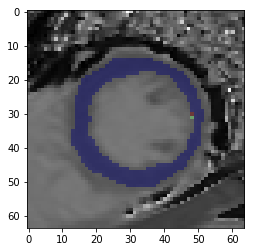

Truth


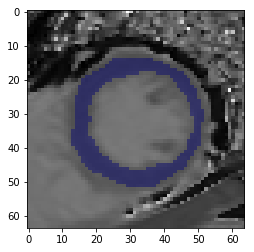

In [20]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

num = 4
fname = features_train['img'][num]
print(fname)

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

## Show Examples 23.tif

17.tif
Predicted


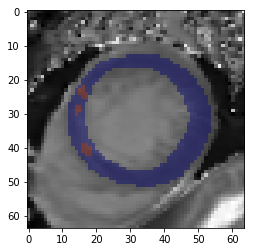

Truth


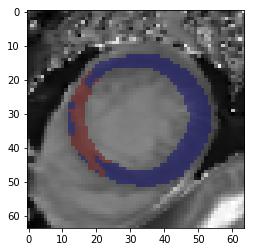

In [19]:
num = 14
fname = features_train['img'][num]
print(fname)

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

## Show Examples 24.tif

176.tif
Predicted


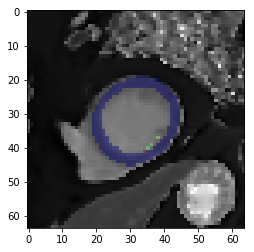

Truth


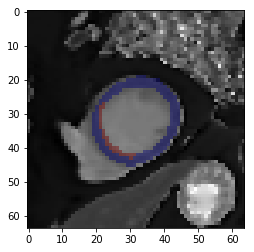

In [18]:
num = 15
fname = features_train['img'][num]
print(fname)

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

## Example of 1.tif

92.tif
Predicted


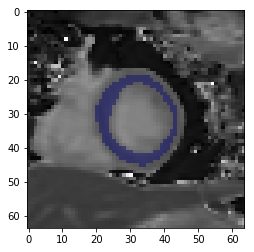

Truth


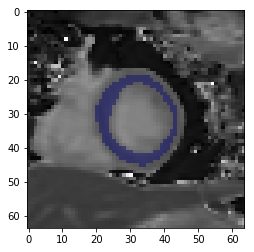

In [29]:
num = 108
fname = features_train['img'][num]
print(fname)

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

In [5]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from glob import glob

def dice(im1, im2):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)
    smooth = 1.
    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return (2. * intersection.sum() + smooth) / (im1.sum() + im2.sum() + smooth)

#base_dir = 'C:/Users/ZhangX1/Documents/Python_Scripts/DeepLearn/output'
base_dir = 'D:/DeepLearn/output'
out_dir = os.path.join(base_dir, 'PredLabel')
in_dir = os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingLabel'))
pred_glob = glob(os.path.join(out_dir, '*'))
test_glob = glob(os.path.join(in_dir, '*'))

probs = list()
for i in range(len(pred_glob)):
    im_pred = Image.open(pred_glob[i])
    im_test = Image.open(test_glob[i])
    
    im_pred = np.array(im_pred)
    im_test = np.array(im_test)
    im_test[im_test <= 1.5] = 0;
    im_test[im_test > 1.5] = 1;
    #print(dice(im_pred, im_test))
    dice_coef = dice(im_pred, im_test)
    if not pd.isnull(dice_coef):
        probs.append(dice_coef)
    else:
        probs.append(1)

print(sorted(probs))
nonz = list(np.nonzero(probs))[0]

nonz_probs = list()
for i in nonz:
    nonz_probs.append(probs[i])
print(np.mean(probs))
np.mean(nonz_probs)

[0.5756302521008403, 0.5903790087463557, 0.6464285714285715, 0.677257525083612, 0.6845753899480069, 0.6907801418439716, 0.6993957703927492, 0.7016129032258065, 0.7049742710120068, 0.7145328719723183, 0.7338603425559947, 0.73515625, 0.737467018469657, 0.7425925925925926, 0.7449908925318761, 0.7473182359952324, 0.752442996742671, 0.7538910505836576, 0.7551826258637709, 0.75591985428051, 0.757328990228013, 0.7663469921534438, 0.771889400921659, 0.7756849315068494, 0.7816245006657789, 0.7825255102040817, 0.7825857519788918, 0.7826617826617827, 0.7855051244509517, 0.7865947611710323, 0.7883096366508688, 0.7884882108183079, 0.7886497064579256, 0.7966640190627482, 0.8104838709677419, 0.8124542124542125, 0.8131212723658051, 0.8150903294367694, 0.8223938223938224, 0.8267451640033642, 0.8278894472361809, 0.8298791018998273, 0.8309248554913294, 0.8317384370015949, 0.8317901234567902, 0.8339960238568589, 0.8355932203389831, 0.8356777493606138, 0.8363259668508287, 0.8397277227722773, 0.840375586854

0.824829583707325

In [6]:
probs

[0.041666666666666664,
 0.5,
 0.22727272727272727,
 0.24183006535947713,
 0.6996336996336996,
 0.11272727272727273,
 0.0684931506849315,
 0.018867924528301886,
 0.16666666666666666,
 0.125,
 0.506578947368421,
 1.0,
 0.07692307692307693,
 0.2,
 0.19736842105263158,
 0.02564102564102564,
 0.34834123222748814,
 0.24311926605504589,
 0.038461538461538464,
 0.01639344262295082,
 0.06666666666666667,
 0.13966480446927373,
 0.03333333333333333,
 0.46875,
 0.2777777777777778,
 0.056910569105691054,
 1.0,
 0.13978494623655913,
 0.16455696202531644,
 0.07878787878787878,
 0.08823529411764706,
 0.1366120218579235,
 0.2,
 0.13513513513513514,
 1.0,
 0.15217391304347827,
 0.03125,
 0.1111111111111111,
 0.09375,
 0.19327731092436976,
 0.015384615384615385,
 0.025,
 0.14893617021276595,
 0.038461538461538464,
 0.5782312925170068,
 0.024390243902439025,
 0.2846715328467153,
 0.14285714285714285,
 0.043478260869565216,
 0.09615384615384616,
 0.03225806451612903,
 0.2391304347826087,
 0.031914893617021

In [25]:
features_train['img']

0        1.tif
1       10.tif
2      104.tif
3      105.tif
4      110.tif
5      126.tif
6      131.tif
7      144.tif
8      151.tif
9      152.tif
10     159.tif
11     163.tif
12     166.tif
13     167.tif
14      17.tif
15     176.tif
16     182.tif
17     183.tif
18     199.tif
19     204.tif
20     205.tif
21     207.tif
22     213.tif
23      22.tif
24     224.tif
25     226.tif
26     229.tif
27     232.tif
28     234.tif
29     236.tif
        ...   
80     410.tif
81      42.tif
82     420.tif
83     428.tif
84     430.tif
85     431.tif
86      44.tif
87      45.tif
88     451.tif
89     457.tif
90     459.tif
91     462.tif
92     469.tif
93     490.tif
94     509.tif
95     511.tif
96     521.tif
97     523.tif
98     527.tif
99     533.tif
100    536.tif
101    540.tif
102    546.tif
103     57.tif
104      6.tif
105     62.tif
106     69.tif
107     71.tif
108     92.tif
109     93.tif
Name: img, Length: 110, dtype: object

## Save the labels

Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted


C:\Users\ZhangX1\AppData\Local\Continuum\anaconda3\envs\JamesZhang\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Predicted
Truth
Pr

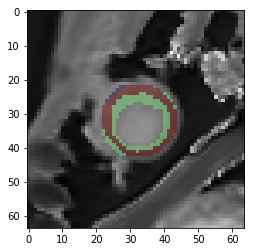

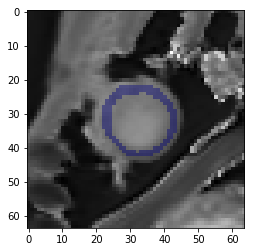

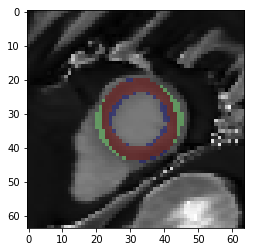

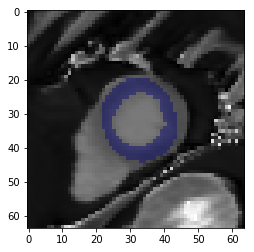

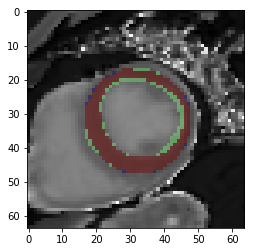

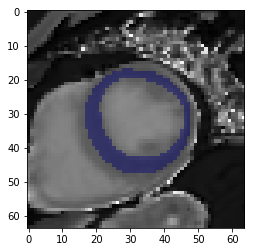

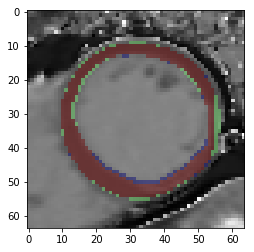

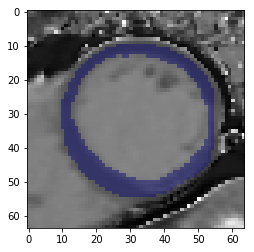

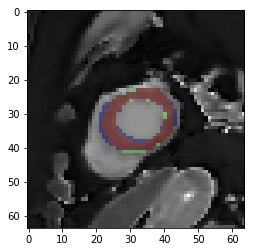

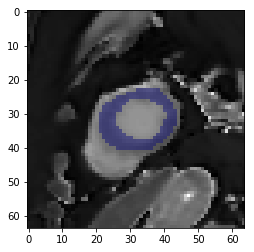

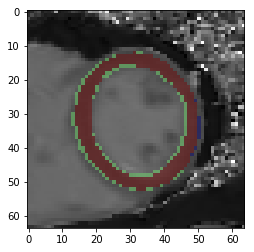

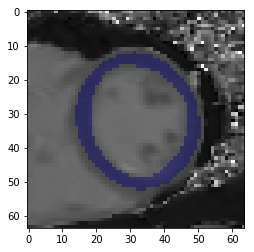

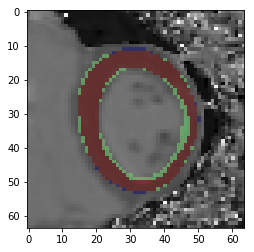

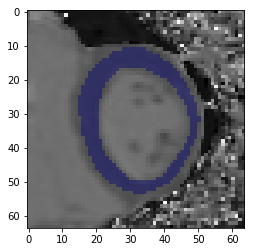

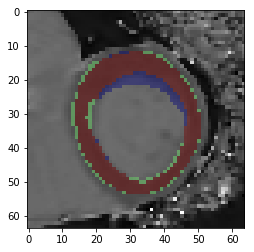

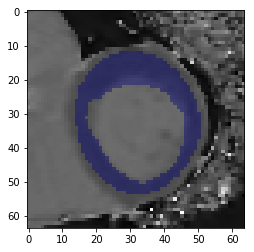

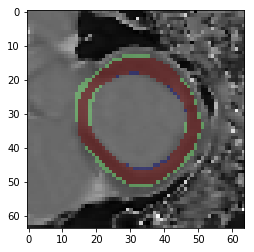

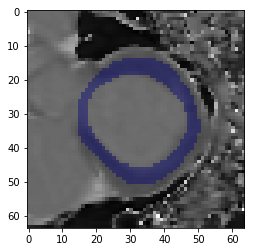

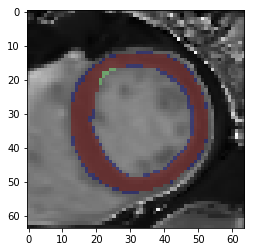

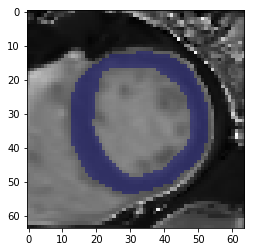

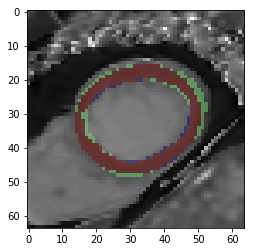

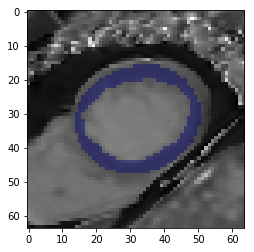

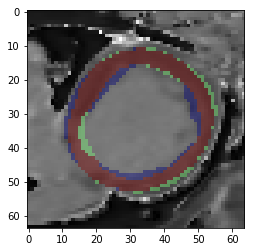

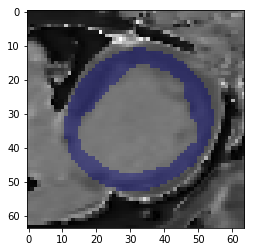

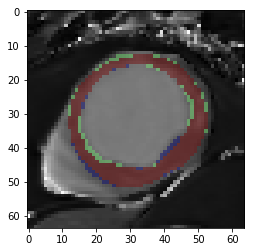

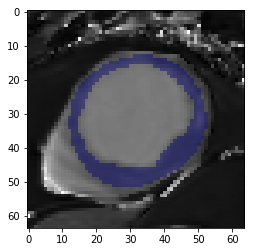

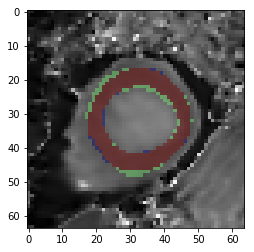

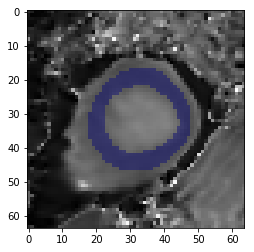

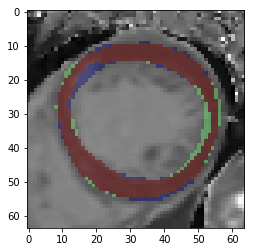

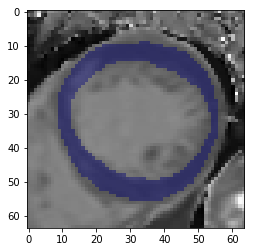

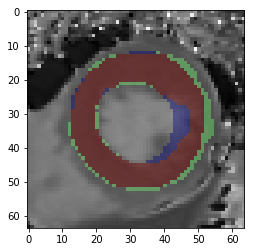

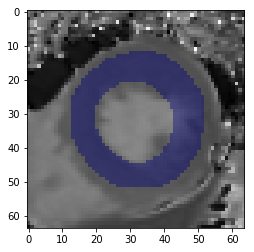

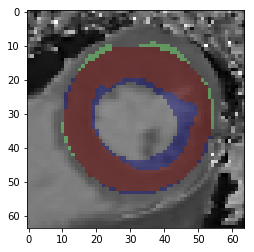

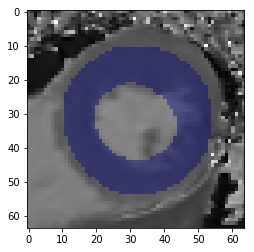

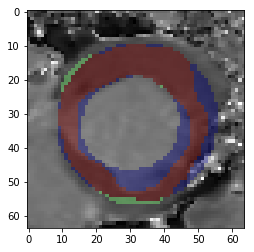

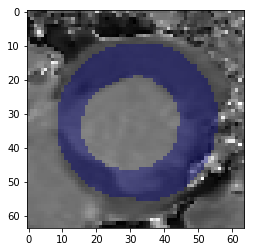

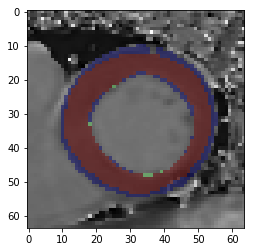

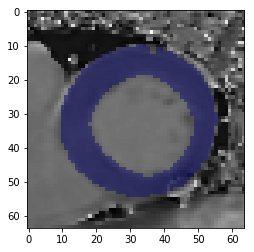

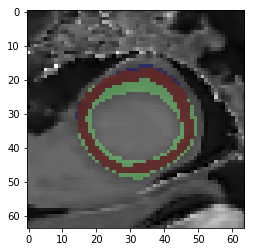

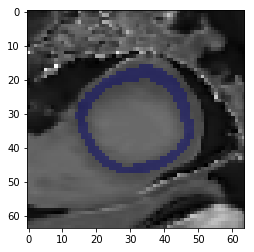

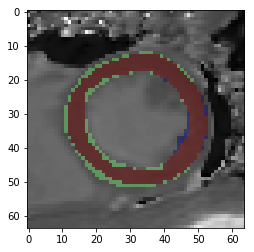

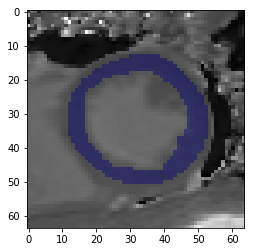

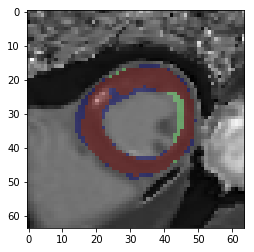

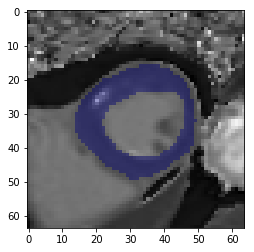

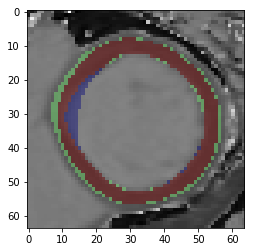

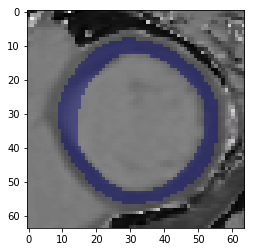

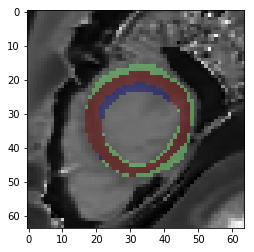

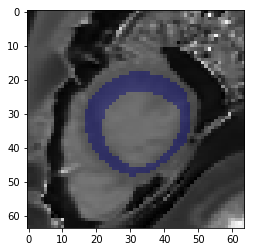

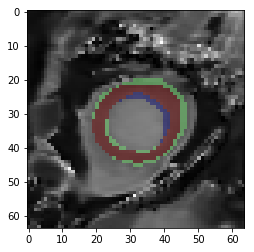

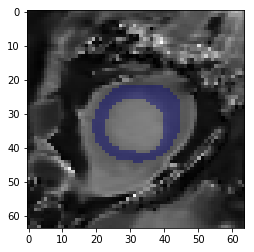

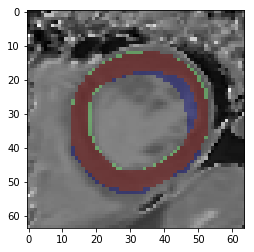

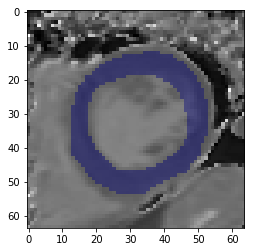

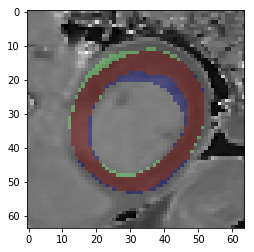

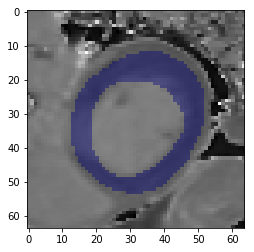

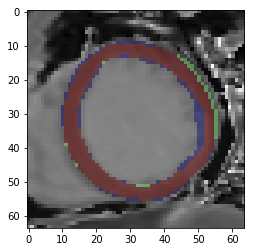

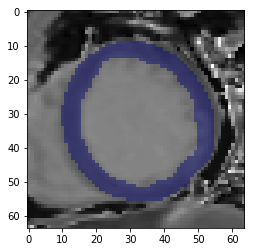

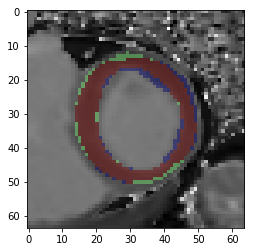

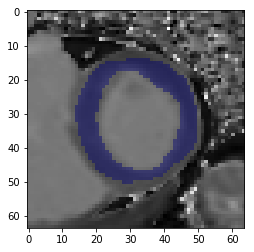

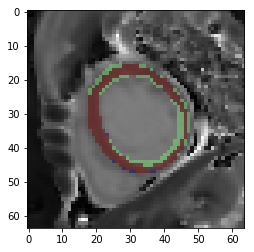

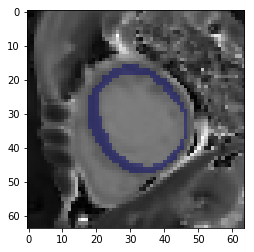

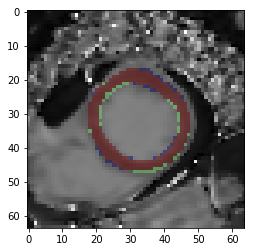

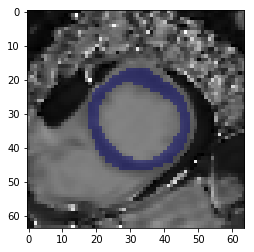

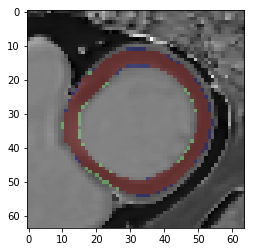

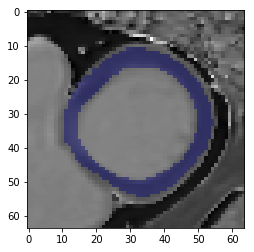

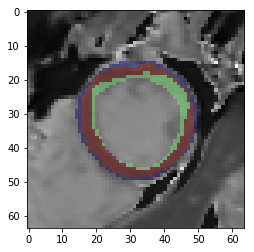

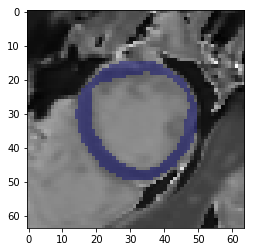

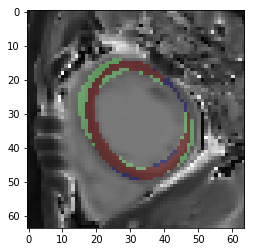

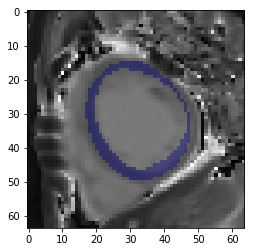

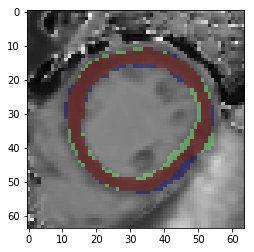

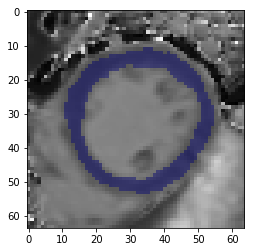

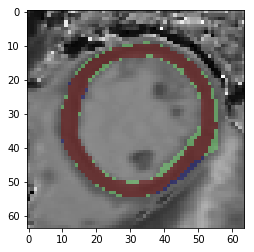

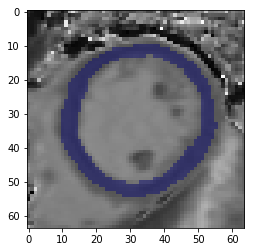

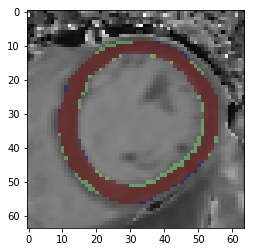

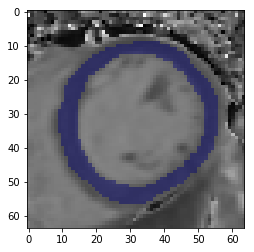

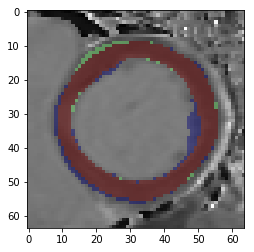

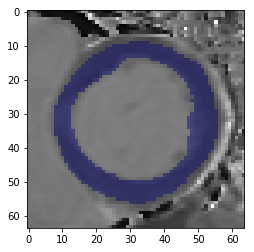

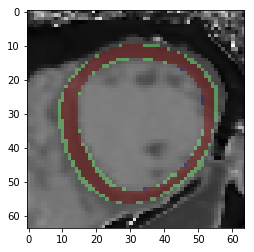

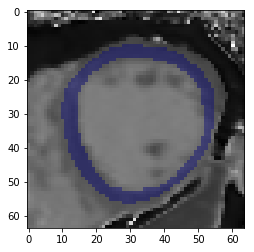

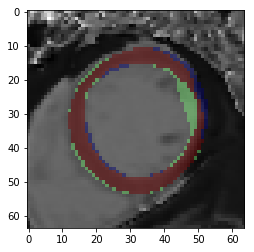

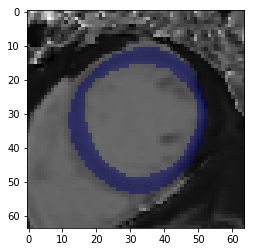

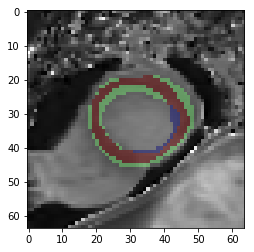

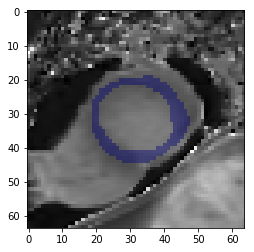

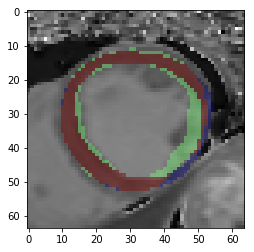

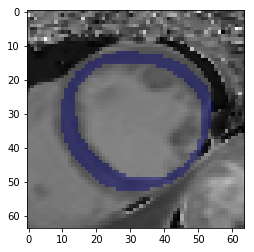

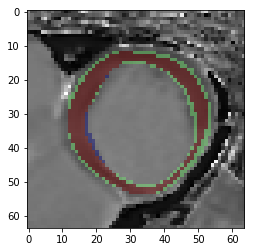

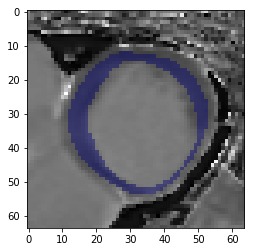

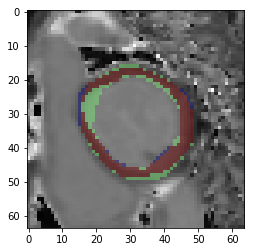

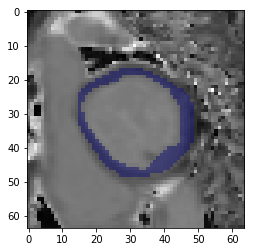

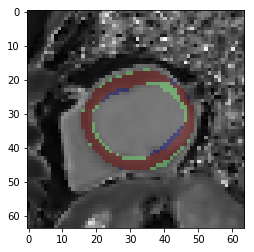

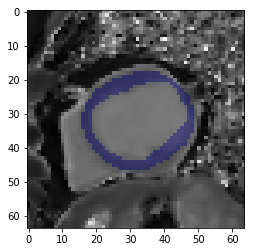

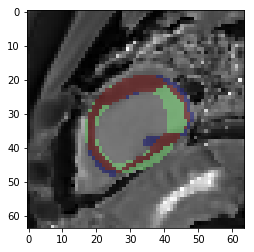

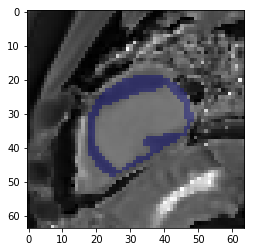

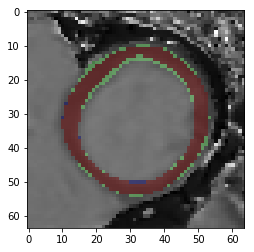

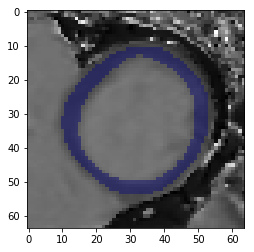

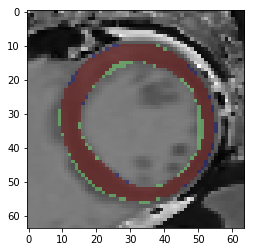

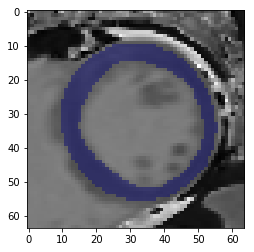

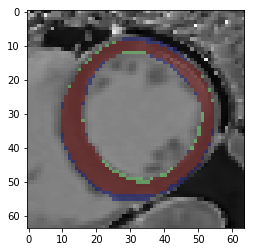

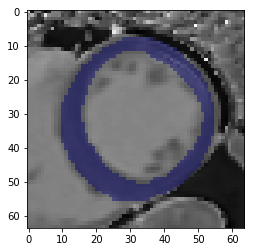

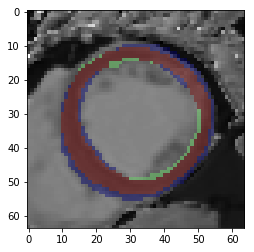

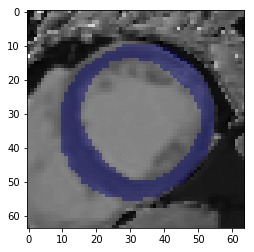

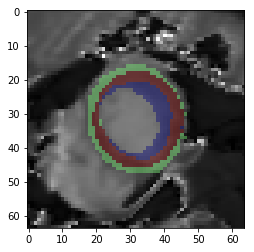

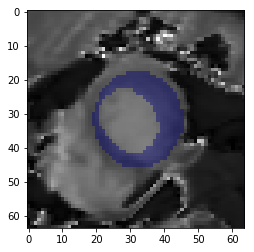

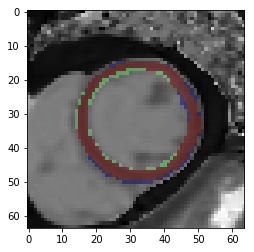

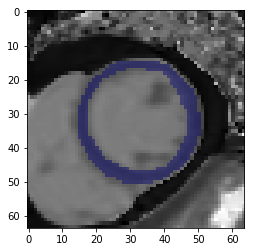

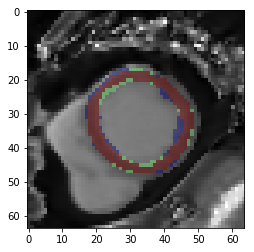

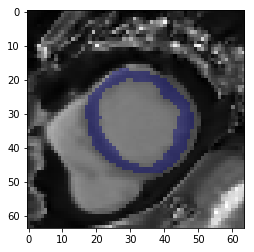

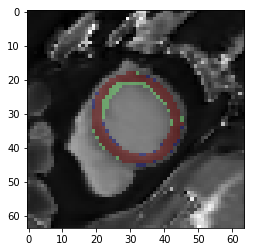

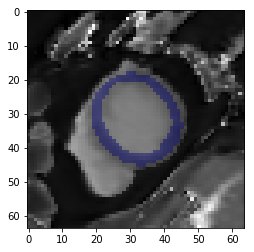

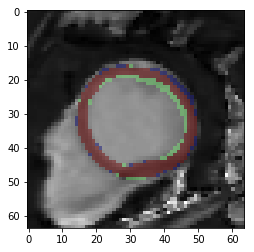

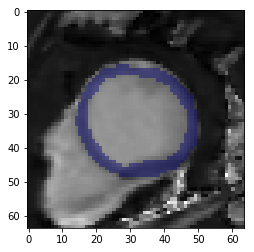

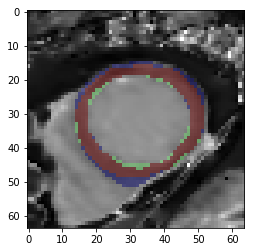

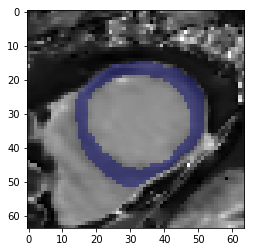

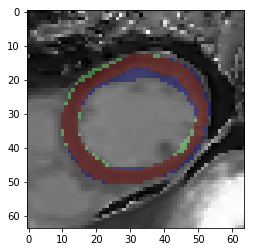

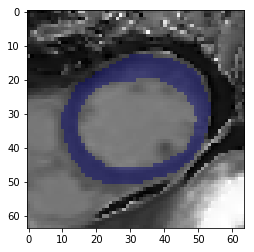

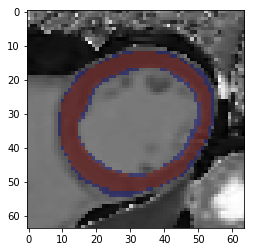

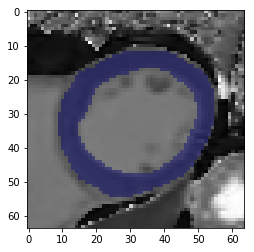

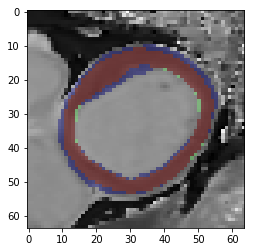

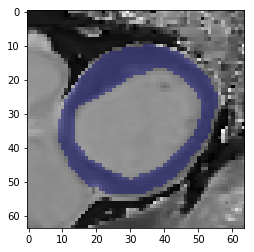

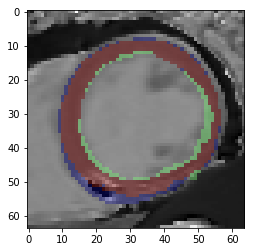

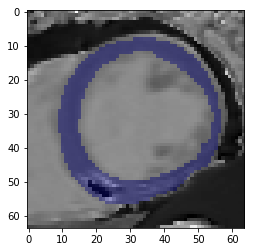

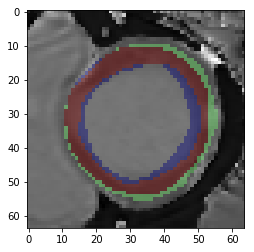

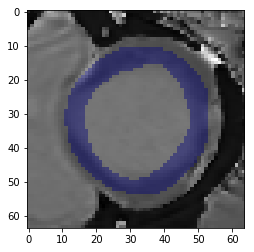

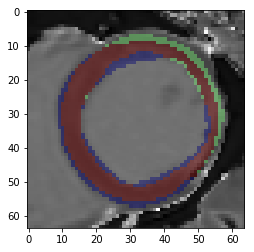

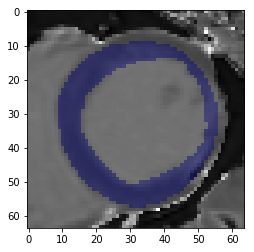

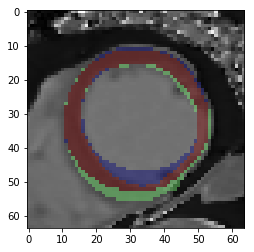

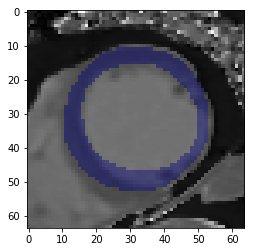

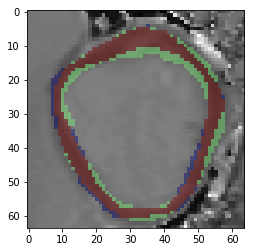

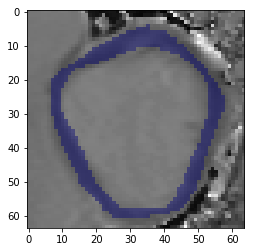

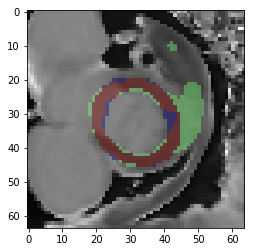

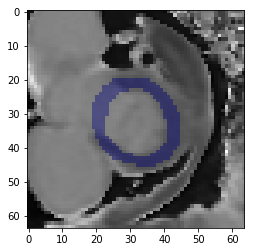

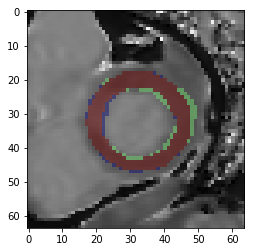

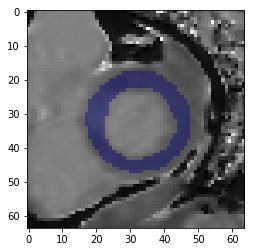

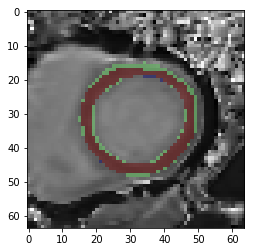

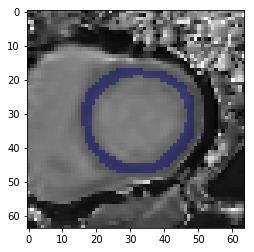

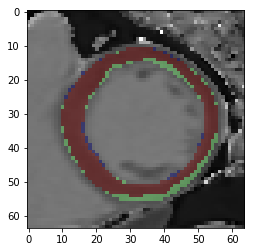

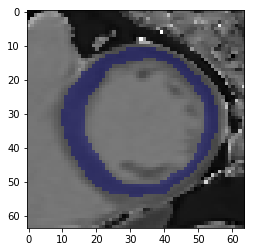

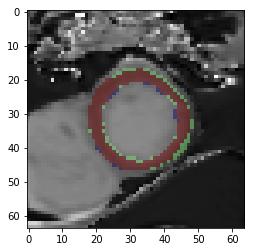

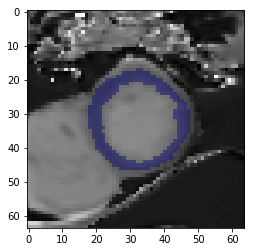

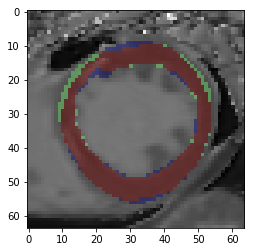

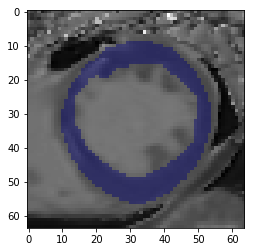

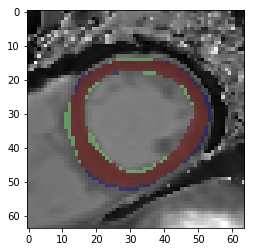

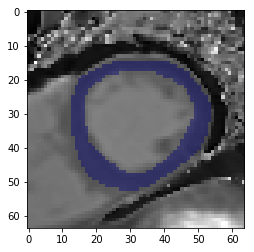

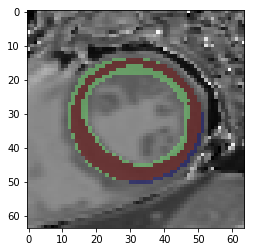

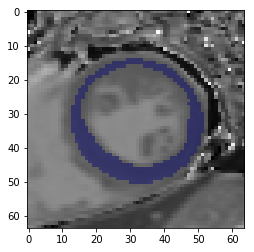

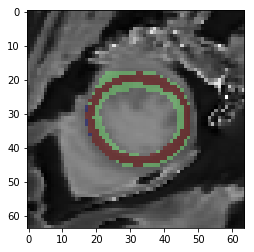

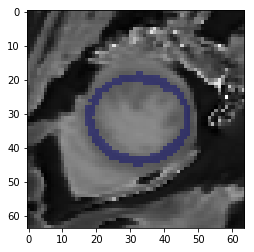

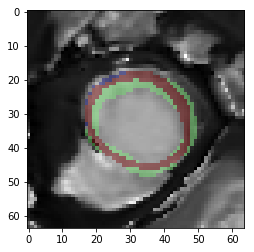

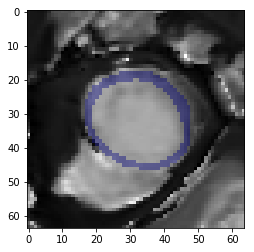

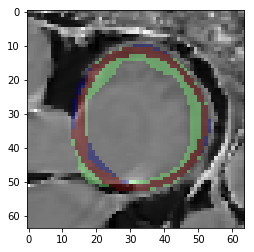

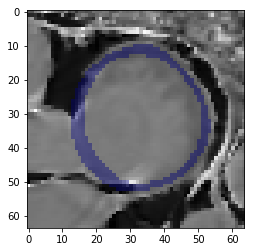

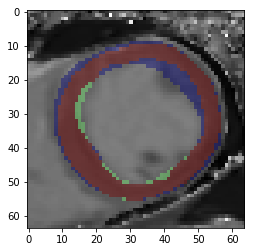

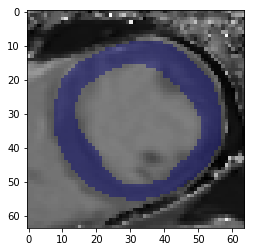

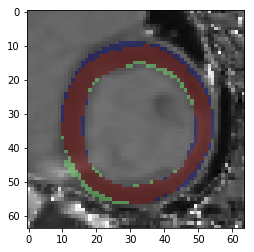

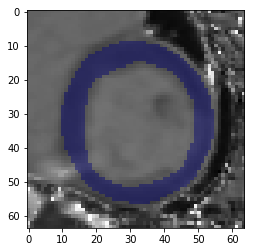

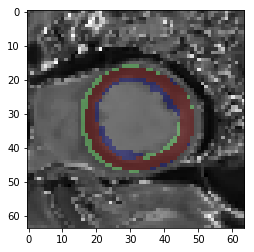

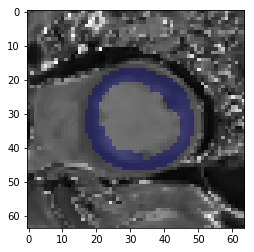

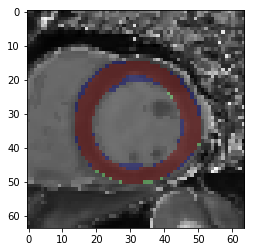

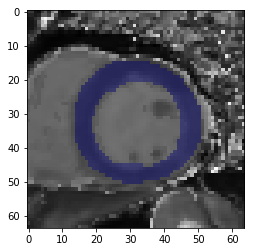

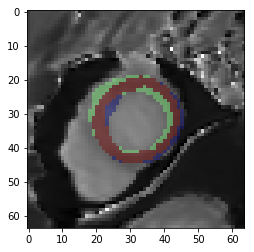

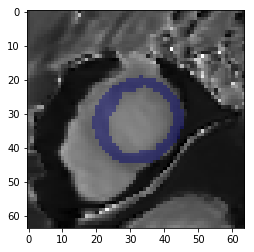

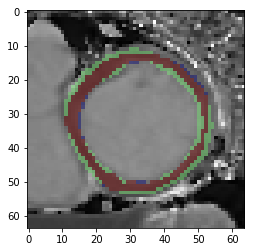

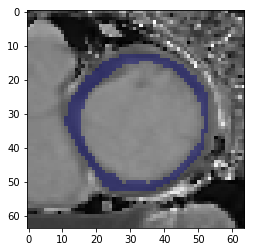

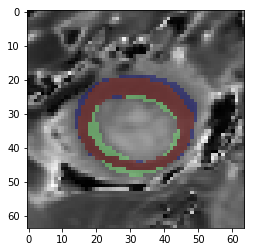

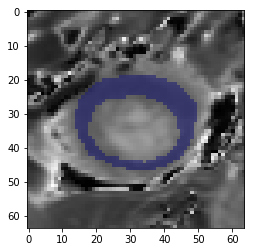

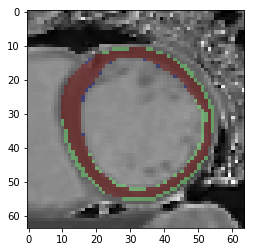

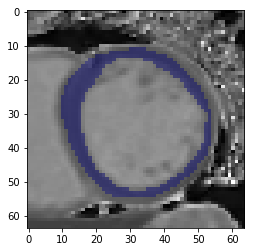

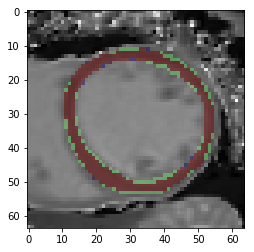

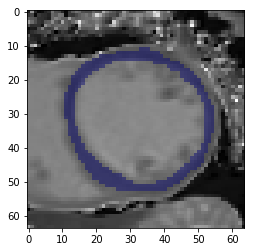

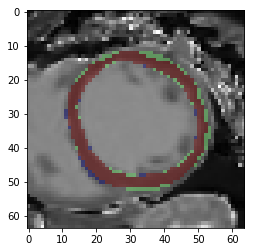

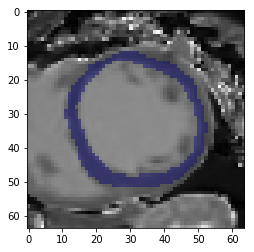

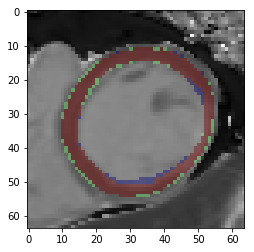

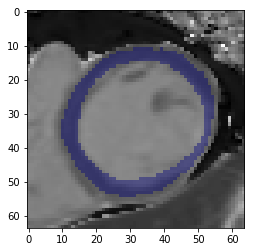

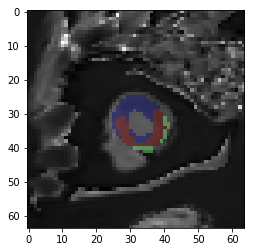

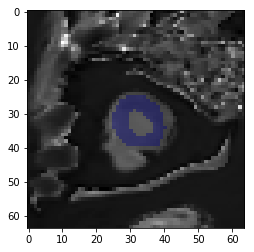

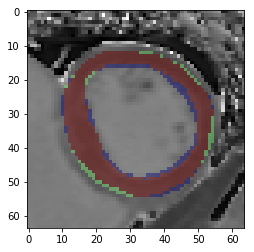

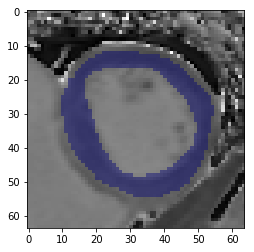

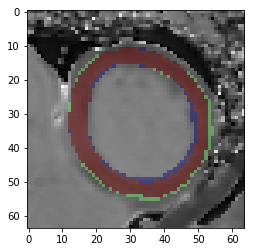

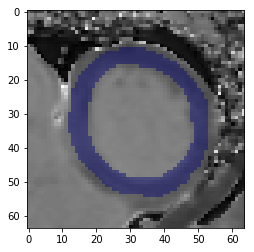

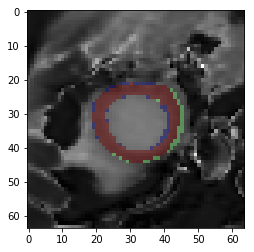

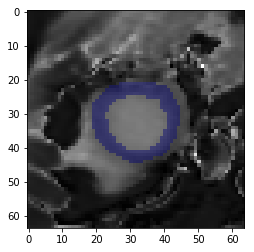

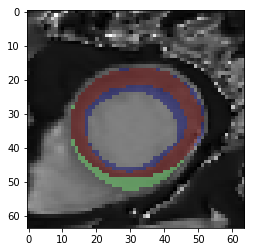

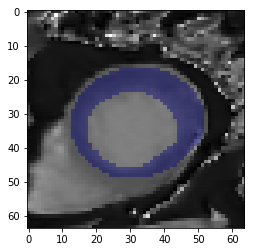

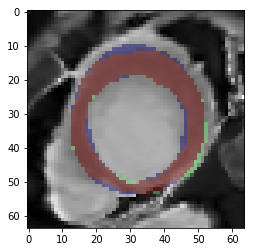

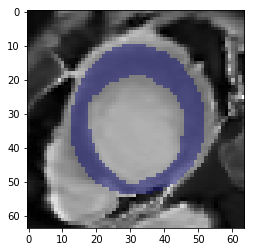

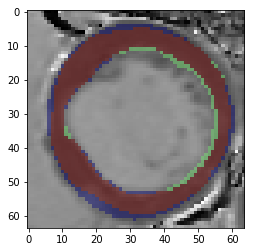

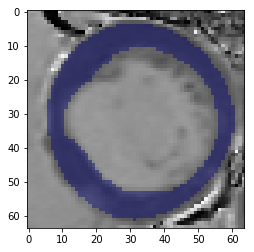

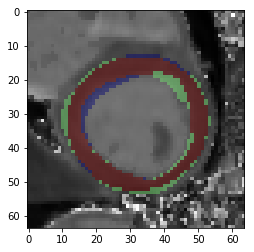

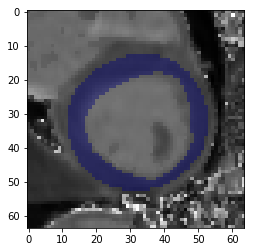

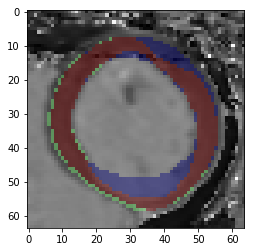

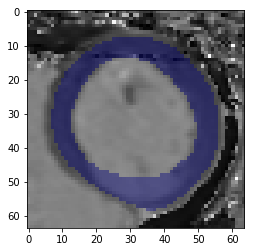

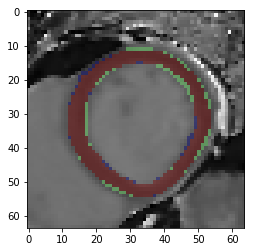

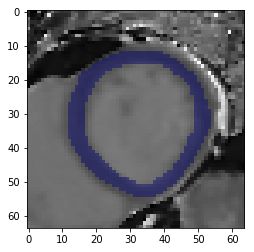

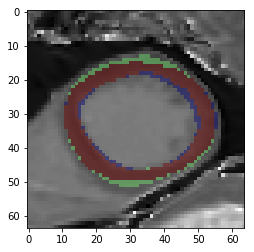

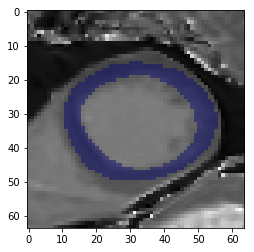

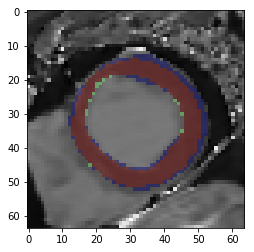

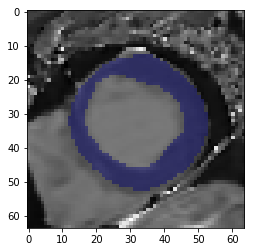

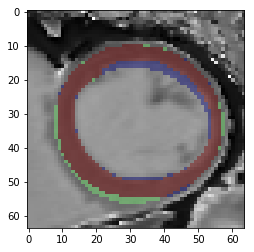

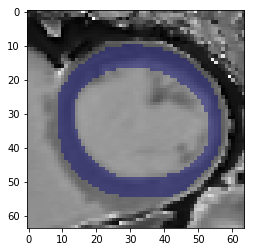

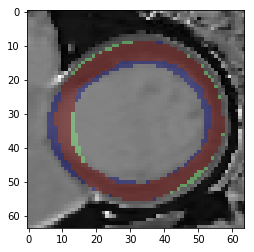

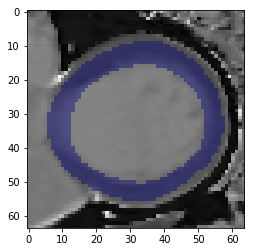

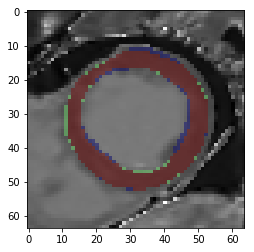

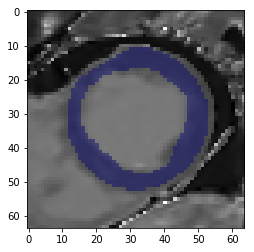

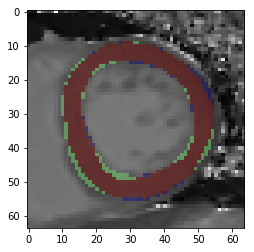

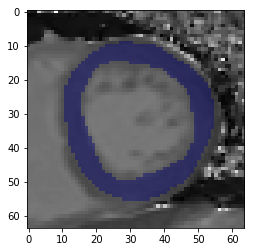

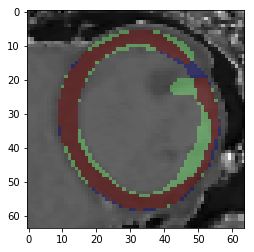

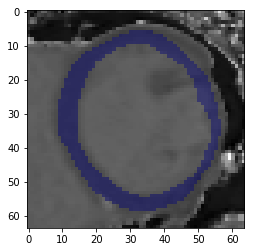

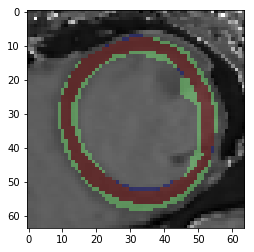

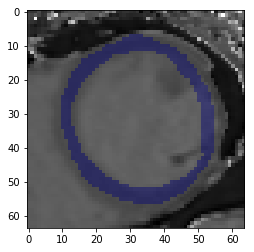

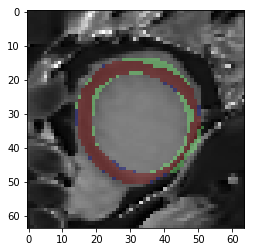

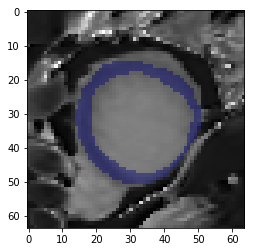

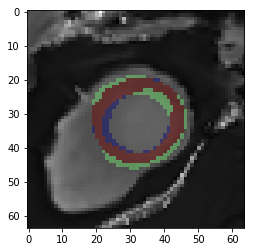

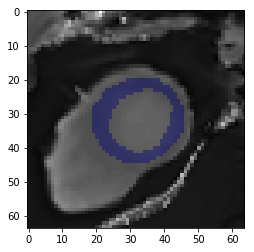

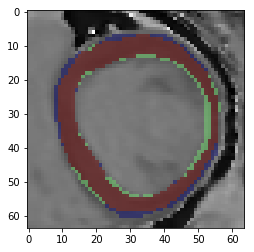

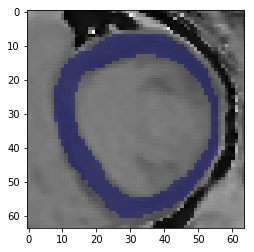

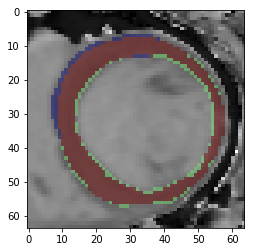

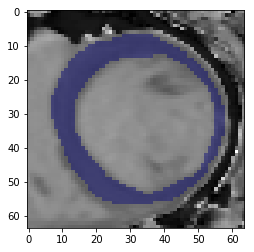

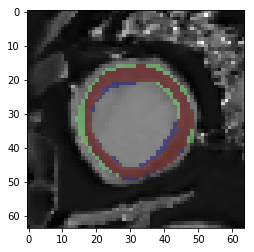

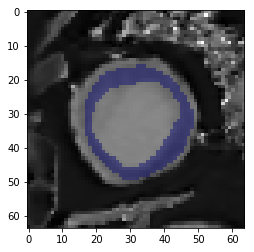

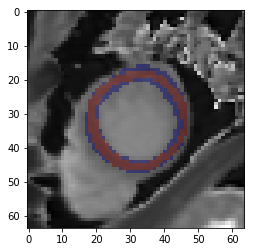

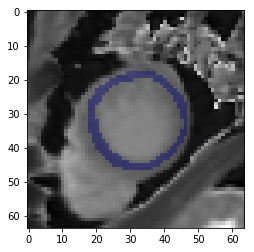

In [6]:
nums = len(features_train['img'])
out_dir = 'D:/DeepLearn/output/OutputImages_01282019_Epoch150_Myocardium'
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)
    
for num in range(nums):
    fname = features_train['img'][num]
    #print(fname)
    
    test_myo = extract_myocardium(composite_path, fname, shape)
    overlay_infarct(test_myo, fname, shape, out_dir)

## Load the model

In [10]:
import torch
from glob import glob
import os

base_dir = 'D:/DeepLearn/output/models'
file_path = glob(os.path.join(base_dir, '*'))
model_file = file_path[-1]

model = torch.load(model_file)



In [11]:
file_path

['D:/DeepLearn/output/models\\model_2019-01-15_12h47',
 'D:/DeepLearn/output/models\\model_2019-01-19_05h03',
 'D:/DeepLearn/output/models\\model_2019-01-20_02h32',
 'D:/DeepLearn/output/models\\model_2019-01-20_17h15',
 'D:/DeepLearn/output/models\\model_2019-01-20_17h43',
 'D:/DeepLearn/output/models\\model_2019-01-20_22h25',
 'D:/DeepLearn/output/models\\model_2019-01-21_19h22',
 'D:/DeepLearn/output/models\\model_2019-01-22_02h29',
 'D:/DeepLearn/output/models\\model_2019-01-22_17h01',
 'D:/DeepLearn/output/models\\model_2019-01-23_03h15',
 'D:/DeepLearn/output/models\\model_2019-01-25_03h08',
 'D:/DeepLearn/output/models\\model_2019-01-26_03h13',
 'D:/DeepLearn/output/models\\model_2019-01-27_03h30',
 'D:/DeepLearn/output/models\\model_2019-01-27_21h56',
 'D:/DeepLearn/output/models\\model_2019-01-28_13h24']

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

BN_EPS = 1e-4


class ConvBnRelu2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, dilation=1, stride=1, groups=1, is_bn=True,
                 is_relu=True):
        super(ConvBnRelu2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=padding, stride=stride,
                              dilation=dilation, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_channels, eps=BN_EPS)
        self.relu = nn.ReLU(inplace=True)
        if is_bn is False: self.bn = None
        if is_relu is False: self.relu = None

    def forward(self, x):
        x = self.conv(x)
        if self.bn is not None:
            x = self.bn(x)
        if self.relu is not None:
            x = self.relu(x)
        return x


## original 3x3 stack filters used in UNet
class StackEncoder(nn.Module):
    def __init__(self, x_channels, y_channels, kernel_size=3):
        super(StackEncoder, self).__init__()
        padding = (kernel_size - 1) // 2
        self.encode = nn.Sequential(
            ConvBnRelu2d(x_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
        )

    def forward(self, x):
        y = self.encode(x)
        y_small = F.max_pool2d(y, kernel_size=2, stride=2)
        return y, y_small


class StackDecoder(nn.Module):
    def __init__(self, x_big_channels, x_channels, y_channels, kernel_size=3):
        super(StackDecoder, self).__init__()
        padding = (kernel_size - 1) // 2

        self.decode = nn.Sequential(
            ConvBnRelu2d(x_big_channels + x_channels, y_channels, kernel_size=kernel_size, padding=padding,
                         dilation=1, stride=1, groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
        )

    def forward(self, x_big, x):
        N, C, H, W = x_big.size()
        # y = F.upsample(x, size=(H, W), mode='bilinear')
        y = F.interpolate(x, size=(H, W), mode='bilinear')
        y = torch.cat([y, x_big], 1)
        y = self.decode(y)
        return y


# 1024x1024
class UNet1024(nn.Module):
    def __init__(self, in_shape):
        super(UNet1024, self).__init__()
        C, H, W = in_shape
        # assert(C==1)

        # 1024
        self.down1 = StackEncoder(C, 24, kernel_size=3)  # 512
        self.down2 = StackEncoder(24, 64, kernel_size=3)  # 256
        self.down3 = StackEncoder(64, 128, kernel_size=3)  # 128
        self.down4 = StackEncoder(128, 256, kernel_size=3)  # 64
        self.down5 = StackEncoder(256, 512, kernel_size=3)  # 32
        self.down6 = StackEncoder(512, 768, kernel_size=3)  # 16

        self.center = nn.Sequential(
            ConvBnRelu2d(768, 768, kernel_size=3, padding=1, stride=1),
        )

        # 8
        # x_big_channels, x_channels, y_channels
        self.up6 = StackDecoder(768, 768, 512, kernel_size=3)  # 16
        self.up5 = StackDecoder(512, 512, 256, kernel_size=3)  # 32
        self.up4 = StackDecoder(256, 256, 128, kernel_size=3)  # 64
        self.up3 = StackDecoder(128, 128, 64, kernel_size=3)  # 128
        self.up2 = StackDecoder(64, 64, 24, kernel_size=3)  # 256
        self.up1 = StackDecoder(24, 24, 24, kernel_size=3)  # 512
        self.classify = nn.Conv2d(24, 1, kernel_size=1, padding=0, stride=1, bias=True)

    def _crop_concat(self, upsampled, bypass):
        """
         Crop y to the (h, w) of x and concat them.
         Used for the expansive path.
        Returns:
            The concatenated tensor
        """
        c = (bypass.size()[2] - upsampled.size()[2]) // 2
        bypass = F.pad(bypass, (-c, -c, -c, -c))

        return torch.cat((upsampled, bypass), 1)

    def forward(self, x):
        out = x  # ;print('x    ',x.size())
        #
        down1, out = self.down1(out)  ##;print('down1',down1.size())  #256
        down2, out = self.down2(out)  # ;print('down2',down2.size())  #128
        down3, out = self.down3(out)  # ;print('down3',down3.size())  #64
        down4, out = self.down4(out)  # ;print('down4',down4.size())  #32
        down5, out = self.down5(out)  # ;print('down5',down5.size())  #16
        down6, out = self.down6(out)  # ;print('down6',down6.size())  #8
        pass  # ;print('out  ',out.size())

        out = self.center(out)
        out = self.up6(down6, out)
        out = self.up5(down5, out)
        out = self.up4(down4, out)
        out = self.up3(down3, out)
        out = self.up2(down2, out)
        out = self.up1(down1, out)
        # 1024

        out = self.classify(out)
        out = torch.squeeze(out, dim=1)
        return out


# 128x128
class UNet128(nn.Module):
    def __init__(self, in_shape):
        super(UNet128, self).__init__()
        C, H, W = in_shape
        # assert(C==3)

        # 128
        self.down3 = StackEncoder(C, 128, kernel_size=3)  # 64
        self.down4 = StackEncoder(128, 256, kernel_size=3)  # 32
        self.down5 = StackEncoder(256, 512, kernel_size=3)  # 16
        self.down6 = StackEncoder(512, 1024, kernel_size=3)  # 8

        self.center = nn.Sequential(
            ConvBnRelu2d(1024, 1024, kernel_size=3, padding=1, stride=1),
        )

        # 8
        # x_big_channels, x_channels, y_channels
        self.up6 = StackDecoder(1024, 1024, 512, kernel_size=3)  # 16
        self.up5 = StackDecoder(512, 512, 256, kernel_size=3)  # 32
        self.up4 = StackDecoder(256, 256, 128, kernel_size=3)  # 64
        self.up3 = StackDecoder(128, 128, 64, kernel_size=3)  # 128
        self.classify = nn.Conv2d(64, 1, kernel_size=1, padding=0, stride=1, bias=True)

    def forward(self, x):
        out = x  # ;print('x    ',x.size())
        down3, out = self.down3(out)  # ;print('down3',down3.size())  #64
        down4, out = self.down4(out)  # ;print('down4',down4.size())  #32
        down5, out = self.down5(out)  # ;print('down5',down5.size())  #16
        down6, out = self.down6(out)  # ;print('down6',down6.size())  #8
        pass  # ;print('out  ',out.size())

        out = self.center(out)
        out = self.up6(down6, out)
        out = self.up5(down5, out)
        out = self.up4(down4, out)
        out = self.up3(down3, out)
        out = self.classify(out)
        out = torch.squeeze(out, dim=1)
        return out


In [4]:
import torch
from glob import glob
import os
import numpy as np
from PIL import Image

#base_dir = 'C:/Users/ZhangX1/Documents/Python_Scripts/DeepLearn/output'
base_dir = 'D:/DeepLearn/output'
file_path = glob(os.path.join(base_dir, 'models/*'))
model_file = file_path[-1]

model = UNet1024((1, 64, 64))
model_dict = torch.load(model_file)
model.load_state_dict(model_dict)
model.cuda() # Push to GPU
model.eval() # turning of BatchNorm

input_file ='D:/DeepLearn/input/TestingData/12.tif'
#input_file = 'C:/Users/ZhangX1/Documents/Python_Scripts/DeepLearn/input/LabelDataTotal/20.tif'
img = np.array(Image.open(input_file))
#example = np.unique(img)


# make example a torch tensor
value = torch.from_numpy(img)

# then put it on the GPU, make it float and insert a fake batch dimension
test_value = torch.autograd.Variable(value.cuda())
test_value = test_value.float()
test_value = test_value.unsqueeze(0).unsqueeze(0) # [1, 1, 64, 64]

# pass it through the model
prediction = model(test_value)

# get the result out and reshape it
cpu_pred = prediction.cpu()
result = cpu_pred.data.numpy()
array_res = np.reshape(result, (64,64))

C:\Users\ZhangX1\AppData\Local\Continuum\anaconda3\envs\JamesZhang\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [29]:
probs = torch.sigmoid(torch.from_numpy(array_res))
m1 = probs.view([1,1,64,64], -1)

test_value.size(0)

1

In [7]:
from PIL import Image

np.max(array_res)

7.371357

In [26]:
model_dict

OrderedDict([('down1.encode.0.conv.weight',
              tensor([[[[-0.1511,  0.0531,  0.4561],
                        [ 0.0741,  0.0765,  0.2674],
                        [-0.1700,  0.1785, -0.0035]]],
              
              
                      [[[ 0.2454,  0.3261,  0.0003],
                        [ 0.1341,  0.3487,  0.3485],
                        [ 0.0495,  0.2849, -0.1619]]],
              
              
                      [[[-0.0949, -0.3506,  0.0175],
                        [ 0.0863,  0.2782,  0.3297],
                        [-0.1513,  0.0352, -0.0573]]],
              
              
                      [[[-0.2091,  0.2116,  0.3366],
                        [-0.0519, -0.2731, -0.2127],
                        [ 0.1262,  0.2816, -0.2639]]],
              
              
                      [[[ 0.1232, -0.0343, -0.1458],
                        [-0.3797,  0.0678,  0.0147],
                        [-0.3237,  0.2694,  0.2271]]],
              
              
 

In [16]:
test_value.unsqueeze(0).shape

torch.Size([1, 1, 64, 64])

In [18]:
model.cuda()

UNet1024(
  (down1): StackEncoder(
    (encode): Sequential(
      (0): ConvBnRelu2d(
        (conv): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(24, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
      )
      (1): ConvBnRelu2d(
        (conv): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(24, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
      )
    )
  )
  (down2): StackEncoder(
    (encode): Sequential(
      (0): ConvBnRelu2d(
        (conv): Conv2d(24, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.0001, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
      )
      (1): ConvBnRelu2d(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    